In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from statsmodels.nonparametric.kde import KDEUnivariate
from scipy.stats import gaussian_kde
from scipy.stats import norm,t
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from numpy.linalg import svd
from numpy import linalg as LA

from IPython.display import HTML
from IPython.display import display

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
skl_lm = linear_model.LinearRegression(fit_intercept=True)
import warnings
#warnings.filterwarnings('ignore')

In [8]:
urlrpps = 'https://raw.githubusercontent.com/SGMAP-AGD/DAMIR/master/fichiers_supplementaires/rpps/rpps_tab3.csv'
dfrpps = pd.read_csv(urlrpps, sep=',')
dfrpps.head()

In [78]:
# estim-pop-dep-sexe-gca-1975-2018.xls
urlPop = r"/home/home/Documents/MSBGD/MasterBigDataTelecom/Cours/INFMDI721 - Kit Big Data/Devoirs/Lesson5_HackatonSante/Sources/estim-pop-dep-sexe-gca-1975-2018.xls"
dfPop = pd.read_excel(urlPop, sheet_name="2016",skiprows=4)

In [79]:
dfPop.head()

,Unnamed: 0,Unnamed: 1,0 à 19 ans,20 à 39 ans,40 à 59 ans,60 à 74 ans,75 ans et plus,Total,0 à 19 ans.1,20 à 39 ans.1,40 à 59 ans.1,60 à 74 ans.1,75 ans et plus.1,Total.1,0 à 19 ans.2,20 à 39 ans.2,40 à 59 ans.2,60 à 74 ans.2,75 ans et plus.2,Total.2
0,01,Ain,167021.0,147968.0,177879.0,94794.0,50205.0,637867.0,85701.0,74232.0,88712.0,46157.0,19966.0,314768.0,81320.0,73736.0,89167.0,48637.0,30239.0,323099.0
1,02,Aisne,136884.0,118130.0,144590.0,89115.0,48704.0,537423.0,69972.0,59041.0,71769.0,42779.0,17841.0,261402.0,66912.0,59089.0,72821.0,46336.0,30863.0,276021.0
2,03,Allier,71186.0,64721.0,92025.0,68089.0,44764.0,340785.0,36354.0,32647.0,45208.0,32178.0,17008.0,163395.0,34832.0,32074.0,46817.0,35911.0,27756.0,177390.0
3,04,Alpes-de-Haute-Provence,34812.0,30191.0,44532.0,32653.0,19626.0,161814.0,18113.0,15040.0,21758.0,15916.0,7957.0,78784.0,16699.0,15151.0,22774.0,16737.0,11669.0,83030.0
4,05,Hautes-Alpes,31451.0,28715.0,39451.0,26042.0,15538.0,141197.0,16068.0,14469.0,19616.0,12678.0,6250.0,69081.0,15383.0,14246.0,19835.0,13364.0,9288.0,72116.0


In [189]:
# Honoraires des professionnels de santé libéraux
urlProfSante = r"/home/home/Documents/MSBGD/MasterBigDataTelecom/Cours/INFMDI721 - Kit Big Data/Devoirs/Lesson5_HackatonSante/Sources/Honoraires_totaux_des_professionnels_de_sante_par_departement_en_2016.xls"
dfProfSante = pd.read_excel(urlProfSante, sheet_name="Spécialistes")
listSpec = set(dfProfSante["Spécialistes"])
listSpec

{'02- Anesthésie-réanimation chirurgicale',
 '03- Pathologie cardio-vasculaire',
 '04- Chirurgie générale',
 '05- Dermato-vénéréologie',
 '06- Radiodiagnostic et imagerie médicale',
 '07- Gynécologie obstétrique',
 '08- Gastro-entérologie et hépatologie',
 '09- Médecine interne',
 '10- Neurochirurgie',
 '11- Oto-rhino-laryngologie',
 '12- Pédiatrie',
 '13- Pneumologie',
 '14- Rhumatologie',
 '15- Ophtalmologie',
 '16- Chirurgie urologique',
 '17- Neuropsychiatrie',
 '18- Stomatologie',
 '20- Réanimation médicale',
 '31- Médecine Physique et de Réadaptation',
 '32- Neurologie',
 '33- Psychiatrie',
 '34-Gériatrie',
 '35- Néphrologie',
 '37- Anatomo-cyto-pathologie',
 '41- Chirurgie orthopédique et traumatologie',
 '42- Endocrinologie et métabolisme',
 '43- Chirurgie infantile',
 '44- Chirurgie maxillo-faciale',
 '45- Chirurgie maxillo-faciale et stomatologie',
 '46- Chirurgie plastique reconstructrice et esthétique',
 '47- Chirurgie thoracique et cardio-vasculaire',
 '48- Chirurgie vascu

In [118]:
filtre = ["FRAIS DE DEPLACEMENT (Euros)","TOTAL DES HONORAIRES (Euros)"]
dfProfSantemod = dfProfSante.drop(filtre,axis=1)


In [119]:
dfProfSanteSupline = dfProfSantemod[dfProfSantemod["DEPASSEMENTS (Euros)"]!="nc"]
dfProfSanteSuplines = dfProfSanteSupline[dfProfSanteSupline["EFFECTIFS"]!=0]
dfProfSanteSuplines["EFFECTIFS"].apply(lambda x: float(x))
dfProfSanteSuplines["DEPASSEMENTS (Euros)"].apply(lambda x: float(x))
dfProfSanteSuplines["DHparP"] = dfProfSanteSuplines["DEPASSEMENTS (Euros)"] / dfProfSanteSuplines["EFFECTIFS"]
dfProfSanteSuplines["NDept"] = dfProfSanteSuplines["DEPARTEMENT"].apply(lambda x : x.split('-')[0])
dfProfSanteSuplines.head()

,Spécialistes,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),DHparP,NDept
0,02- Anesthésie-réanimation chirurgicale,01- Ain,17,4.53008e+06,2.49618e+06,146834,01
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,19,4.98526e+06,373838,19675.7,02
2,02- Anesthésie-réanimation chirurgicale,03- Allier,19,5.1029e+06,560979,29525.2,03
5,02- Anesthésie-réanimation chirurgicale,06- Alpes-Maritimes,110,2.48538e+07,1.08163e+07,98330.4,06
6,02- Anesthésie-réanimation chirurgicale,07- Ardèche,23,5.27125e+06,802542,34893.1,07


,Spécialistes,DEPARTEMENT,EFFECTIFS,DEPASSEMENTS (Euros),DHparP,NDept,Population
0,02- Anesthésie-réanimation chirurgicale,01- Ain,17,2.49618e+06,146834,01,314768
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,19,373838,19675.7,02,261402
2,02- Anesthésie-réanimation chirurgicale,03- Allier,19,560979,29525.2,03,163395
5,02- Anesthésie-réanimation chirurgicale,06- Alpes-Maritimes,110,1.08163e+07,98330.4,06,NaN
6,02- Anesthésie-réanimation chirurgicale,07- Ardèche,23,802542,34893.1,07,NaN


In [185]:
for i in dfProfSanteSuplines.index:
    for j in range(100):
        if dfPop.loc[j,"Unnamed: 0"] == dfProfSanteSuplines.loc[i,"NDept"]:
            dfProfSanteSuplines.loc[i,"Population"] = dfPop.loc[j,"Total"]
            break

In [121]:
dfProfSanteSuplines["densMparSparDpt"] = dfProfSanteSuplines["EFFECTIFS"] / dfProfSanteSuplines["Population"]

In [122]:
dfProfSanteSuplines.head()

,Spécialistes,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),DHparP,NDept,Population,densMparSparDpt
0,02- Anesthésie-réanimation chirurgicale,01- Ain,17,4.53008e+06,2.49618e+06,146834,01,314768.0,0.000054
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,19,4.98526e+06,373838,19675.7,02,261402.0,0.000073
2,02- Anesthésie-réanimation chirurgicale,03- Allier,19,5.1029e+06,560979,29525.2,03,163395.0,0.000116
5,02- Anesthésie-réanimation chirurgicale,06- Alpes-Maritimes,110,2.48538e+07,1.08163e+07,98330.4,06,512897.0,0.000214
6,02- Anesthésie-réanimation chirurgicale,07- Ardèche,23,5.27125e+06,802542,34893.1,07,158972.0,0.000145


12.088511964338249 [    0.         86139.66307304]


<IPython.core.display.Javascript object>


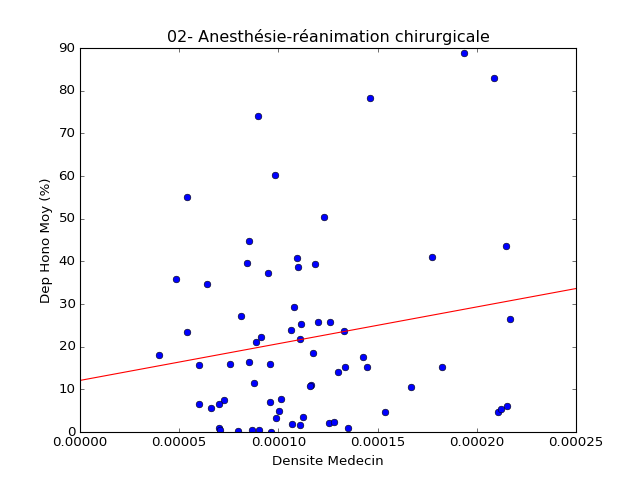

In [184]:
Spec = '02- Anesthésie-réanimation chirurgicale'
MatParSpe = dfProfSanteSuplines[dfProfSanteSuplines['Spécialistes'] == Spec]
#MatParSpedna = MatParSpe[MatParSpe["Population"]!=NaN]
MatParSpe = MatParSpe.dropna()
X = MatParSpe["EFFECTIFS"] / MatParSpe["Population"]
Y = 100 * (MatParSpe["DEPASSEMENTS (Euros)"] / MatParSpe["HONORAIRES SANS DEPASSEMENT (Euros)"])
Xi = sm.add_constant(X)

skl_lm.fit(Xi, Y)
a = skl_lm.intercept_
b = skl_lm.coef_
x = np.linspace(0,0.00025,10)
xi = sm.add_constant(x)
y = skl_lm.predict(xi)
print(a,b)

%matplotlib notebook
plt.figure()
plt.plot(X,Y, 'bo')        
plt.plot(x,y, 'r-') 
plt.title(Spec)
plt.xlabel("Densite Medecin")
plt.ylabel("Dep Hono Moy (%)")
plt.show()

In [173]:
MatParSpena

,Spécialistes,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),DHparP,NDept,Population,densMparSparDpt
0,02- Anesthésie-réanimation chirurgicale,01- Ain,17,4.53008e+06,2.49618e+06,146834,01,314768.0,0.000054
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,19,4.98526e+06,373838,19675.7,02,261402.0,0.000073
2,02- Anesthésie-réanimation chirurgicale,03- Allier,19,5.1029e+06,560979,29525.2,03,163395.0,0.000116
5,02- Anesthésie-réanimation chirurgicale,06- Alpes-Maritimes,110,2.48538e+07,1.08163e+07,98330.4,06,512897.0,0.000214
6,02- Anesthésie-réanimation chirurgicale,07- Ardèche,23,5.27125e+06,802542,34893.1,07,158972.0,0.000145
9,02- Anesthésie-réanimation chirurgicale,10- Aube,12,3.69362e+06,9543.92,795.327,10,150510.0,0.000080
10,02- Anesthésie-réanimation chirurgicale,11- Aude,17,4.49699e+06,313840,18461.2,11,177364.0,0.000096
12,02- Anesthésie-réanimation chirurgicale,13- Bouches-du-Rhône,209,4.84844e+07,3.00005e+06,14354.3,13,970653.0,0.000215
13,02- Anesthésie-réanimation chirurgicale,14- Calvados,42,1.38657e+07,304614,7252.72,14,334379.0,0.000126
15,02- Anesthésie-réanimation chirurgicale,16- Charente,19,5.54598e+06,1.20756e+06,63556,16,171410.0,0.000111


<IPython.core.display.Javascript object>


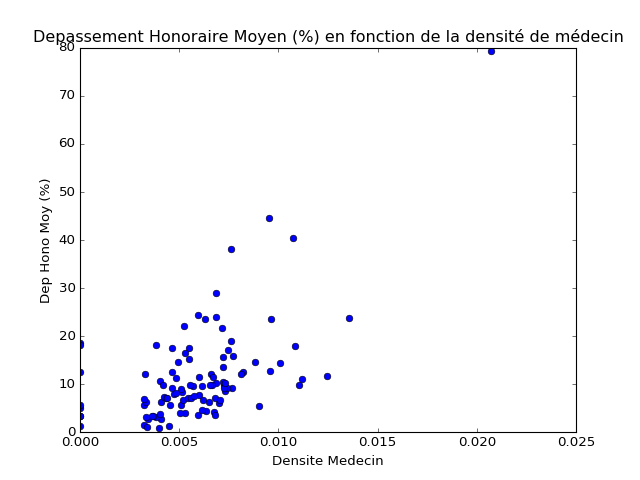

In [130]:
densMparD = dfProfSanteSuplines.groupby(['NDept'])['densMparSparDpt'].sum()
NbMparD = dfProfSanteSuplines.groupby(['NDept'])['EFFECTIFS'].sum()
DepparD = dfProfSanteSuplines.groupby(['NDept'])['DEPASSEMENTS (Euros)'].sum()
HonoparD = dfProfSanteSuplines.groupby(['NDept'])['HONORAIRES SANS DEPASSEMENT (Euros)'].sum()
DepMparD = 100 * (DepparD / HonoparD)

%matplotlib notebook
plt.figure()
plt.plot(densMparD,DepMparD, 'bo')        

plt.title("Depassement Honoraire Moyen (%) en fonction de la densité de médecin")
plt.xlabel("Densite Medecin")
plt.ylabel("Dep Hono Moy (%)")
plt.show()

In [ ]:
Spec = '02- Anesthésie-réanimation chirurgicale'
MatParSpe = dfProfSanteSuplines[dfProfSanteSuplines['Spécialistes'] == Spec]
#MatParSpedna = MatParSpe[MatParSpe["Population"]!=NaN]
MatParSpe = MatParSpe.dropna()
X = MatParSpe["EFFECTIFS"] / MatParSpe["Population"]
Y = 100 * (MatParSpe["DEPASSEMENTS (Euros)"] / MatParSpe["HONORAIRES SANS DEPASSEMENT (Euros)"])
Xi = sm.add_constant(X)

skl_lm.fit(Xi, Y)
a = skl_lm.intercept_
b = skl_lm.coef_
x = np.linspace(0,0.00025,10)
xi = sm.add_constant(x)
y = skl_lm.predict(xi)
print(a,b)

%matplotlib notebook
plt.figure()
plt.plot(X,Y, 'bo')        
plt.plot(x,y, 'r-') 
plt.title(Spec)
plt.xlabel("Densite Medecin")
plt.ylabel("Dep Hono Moy (%)")
plt.show()

In [41]:
dfProfSanteSuplinesGroupBy = dfProfSanteSuplines.groupby(['Spécialistes','DEPARTEMENT'])['DEPASSEMENTS (Euros)'].sum()
dfProfSanteSuplinesGroupBy

Spécialistes                             DEPARTEMENT                
02- Anesthésie-réanimation chirurgicale  01- Ain                        2.496180e+06
                                         02- Aisne                      3.738376e+05
                                         03- Allier                     5.609786e+05
                                         06- Alpes-Maritimes            1.081635e+07
                                         07- Ardèche                    8.025420e+05
                                         09- Ariège                     0.000000e+00
                                         10- Aube                       9.543920e+03
                                         11- Aude                       3.138400e+05
                                         13- Bouches-du-Rhône           3.000051e+06
                                         14- Calvados                   3.046143e+05
                                         16- Charente                   1.207563e

In [ ]:
dfDH = pd.DataFrame([["num","dpt","Taux de dépassement 2016"],["Ain","Ain",43.3],["Aisne","Aisne",29],["Allier","Allier",35.3],["Alpes-de-Haute-Provence","Alpes-de-Haute-Provence",45],["Hautes-Alpes","Hautes-Alpes",17.9],["Alpes-Maritimes","Alpes-Maritimes",51.5],["Ardèche","Ardèche",43.8],["Ardennes","Ardennes",34.8],["Ariège","Ariège",43],["Aube","Aube",50.5],["Aude","Aude",22.2],["Aveyron","Aveyron",12.9],["Bouches-du-Rhône","Bouches-du-Rhône",41.4],["Calvados","Calvados",33.4],["Cantal","Cantal",10.9],["Charente","Charente",35.6],["Charente-Maritime","Charente-Maritime",32.9],["Cher","Cher",30.1],["Corrèze","Corrèze",41.2],["Côte-d'Or","Côte-d'Or",41.6],["Côtes-d'Armor","Côtes-d'Armor",26.1],["Creuse","Creuse",16.5],["Dordogne","Dordogne",39],["Doubs","Doubs",36.4],["Drôme","Drôme",39.1],["Eure","Eure",48.4],["Eure-et-Loir","Eure-et-Loir",59.2],["Finistère","Finistère",26.4],["Corse-du-Sud","Corse-du-Sud",32.9],["Haute-Corse","Haute-Corse",33.8],["Gard","Gard",42.4],["Haute-Garonne","Haute-Garonne",43],["Gers","Gers",34.6],["Gironde","Gironde",40.5],["Hérault","Hérault",38.3],["Ille-et-Vilaine","Ille-et-Vilaine",30.8],["Indre","Indre",44.9],["Indre-et-Loire","Indre-et-Loire",36],["Isère","Isère",54.3],["Jura","Jura",32.7],["Landes","Landes",42.9],["Loir-et-Cher","Loir-et-Cher",27.6],["Loire","Loire",39.1],["Haute-Loire","Haute-Loire",41.1],["Loire-Atlantique","Loire-Atlantique",30],["Loiret","Loiret",46.7],["Lot","Lot",34.5],["Lot-et-Garonne","Lot-et-Garonne",33.4],["Lozère","Lozère",56],["Maine-et-Loire","Maine-et-Loire",33.5],["Manche","Manche",19.9],["Marne","Marne",40.4],["Haute-Marne","Haute-Marne",35.5],["Mayenne","Mayenne",30],["Meurthe-et-Moselle","Meurthe-et-Moselle",39.5],["Meuse","Meuse",33.2],["Morbihan","Morbihan",24.2],["Moselle","Moselle",37.5],["Nièvre","Nièvre",49.3],["Nord","Nord",45],["Oise","Oise",49.9],["Orne","Orne",23.9],["Pas-de-Calais","Pas-de-Calais",29.3],["Puy-de-Dôme","Puy-de-Dôme",37.5],["Pyrénées-Atlantiques","Pyrénées-Atlantiques",43.4],["Hautes-Pyrénées","Hautes-Pyrénées",41.7],["Pyrénées-Orientales","Pyrénées-Orientales",21.6],["Bas-Rhin","Bas-Rhin",62.4],["Haut-Rhin","Haut-Rhin",63.8],["Rhône","Rhône",72.6],["Haute-Saône","Haute-Saône",29.8],["Saône-et-Loire","Saône-et-Loire",49],["Sarthe","Sarthe",37.8],["Savoie","Savoie",49.3],["Haute-Savoie","Haute-Savoie",56.5],["Paris","Paris",114.7],["Seine-Maritime","Seine-Maritime",29.9],["Seine-et-Marne","Seine-et-Marne",47.7],["Yvelines","Yvelines",68.7],["Deux-Sèvres","Deux-Sèvres",27.9],["Somme","Somme",39.7],["Tarn","Tarn",23],["Tarn-et-Garonne","Tarn-et-Garonne",26.1],["Var","Var",36.3],["Vaucluse","Vaucluse",46.5],["Vendée","Vendée",32.7],["Vienne","Vienne",29.1],["Haute-Vienne","Haute-Vienne",32.6],["Vosges","Vosges",31.5],["Yonne","Yonne",43.5],["Territoire de Belfort","Territoire de Belfort",54.2],["Essonne","Essonne",45.8],["Hauts-de-Seine","Hauts-de-Seine",71.5],["Seine-Saint-Denis","Seine-Saint-Denis",37.8],["Val-de-Marne","Val-de-Marne",59.4],["Val-d'Oise","Val-d'Oise",51.3],["Guadeloupe","Guadeloupe",18.1],["Martinique","Martinique",46.4],["Guyane","Guyane",30.3],["La Réunion","La Réunion",18.8]])
dfDH

,Spécialistes,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENT (Euros),TOTAL DES HONORAIRES (Euros)
0,02- Anesthésie-réanimation chirurgicale,01- Ain,17,4.53008e+06,2.49618e+06,0,7.02626e+06
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,19,4.98526e+06,373838,0,5.3591e+06
2,02- Anesthésie-réanimation chirurgicale,03- Allier,19,5.1029e+06,560979,0,5.66388e+06
3,02- Anesthésie-réanimation chirurgicale,04- Alpes-Hte-Provence,4,nc,nc,nc,nc
4,02- Anesthésie-réanimation chirurgicale,05- Hautes-Alpes,5,nc,nc,nc,nc
5,02- Anesthésie-réanimation chirurgicale,06- Alpes-Maritimes,110,2.48538e+07,1.08163e+07,0,3.56701e+07
6,02- Anesthésie-réanimation chirurgicale,07- Ardèche,23,5.27125e+06,802542,0,6.07379e+06
7,02- Anesthésie-réanimation chirurgicale,08- Ardennes,6,nc,nc,nc,nc
8,02- Anesthésie-réanimation chirurgicale,09- Ariège,0,0,0,0,0
9,02- Anesthésie-réanimation chirurgicale,10- Aube,12,3.69362e+06,9543.92,0,3.70317e+06
